# LEVEL 3

# Task 1: Restaurant Reviews
    1. Analyze the text reviews to identify the most common positive and negative keywords.
    2. Calculate the average length of reviews and explore if there is a relationship between review length and rating

In [41]:
# Import library files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('Dataset.csv')
data


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [42]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# 1. Analyze the text reviews to identify the most common positive and negative keywords.

In [43]:
!pip3 install nltk
!pip install wordcloud


from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
import wordcloud
import nltk

from wordcloud import WordCloud

nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sathy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

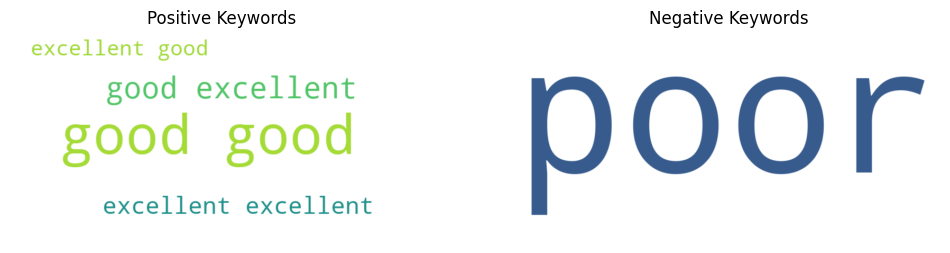

Top Positive Keywords: [('good', 3179), ('very', 1079), ('excellent', 301)]
Top Negative Keywords: [('poor', 186)]


In [44]:

# Remove rows with missing 'Rating text'
data = data.dropna(subset=['Rating text'])

# Convert 'Rating text' to lowercase
data['Rating text'] = data['Rating text'].str.lower()

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment label
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis and create a new 'Sentiment' column
data['Sentiment'] = data['Rating text'].apply(get_sentiment)

# Filter positive and negative reviews
positive_reviews = data[data['Sentiment'] == 'positive']
negative_reviews = data[data['Sentiment'] == 'negative']

# Tokenize and count words in positive and negative reviews
positive_words = ' '.join(positive_reviews['Rating text']).split()
negative_words = ' '.join(negative_reviews['Rating text']).split()

# Get the most common words
top_positive_keywords = Counter(positive_words).most_common(10)
top_negative_keywords = Counter(negative_words).most_common(10)

# Visualize word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words))

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Keywords')
plt.axis('off')

plt.subplot(122)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Keywords')
plt.axis('off')

plt.show()

# Display the most common positive and negative keywords
print("Top Positive Keywords:", top_positive_keywords)
print("Top Negative Keywords:", top_negative_keywords)


# 2. Calculate the average length of reviews and explore if there is a relationship between review length and rating

Average Review Length (Words): 1.3378703800649148


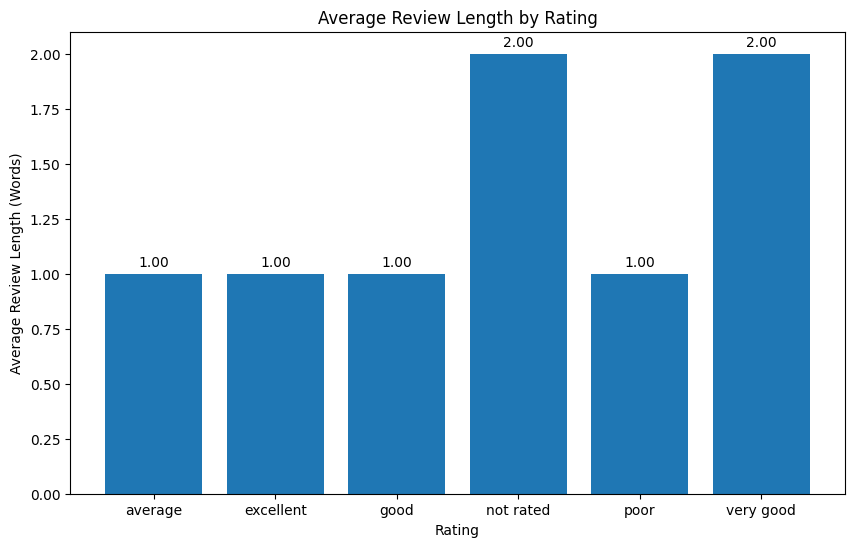

In [45]:
# Calculate review length (number of words) and add it as a new column
data['Review Length (Words)'] = data['Rating text'].apply(lambda x: len(str(x).split()))

# Calculate the average review length for all reviews
average_review_length = data['Review Length (Words)'].mean()
print("Average Review Length (Words):", average_review_length)

# Group data by rating and calculate the average review length for each group
rating_groups = data.groupby('Rating text')['Review Length (Words)'].mean().reset_index()

# Visualize the relationship between review length and rating
plt.figure(figsize=(10, 6))
plt.bar(rating_groups['Rating text'], rating_groups['Review Length (Words)'])
plt.xlabel('Rating')
plt.ylabel('Average Review Length (Words)')
plt.title('Average Review Length by Rating')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',  # Format the value as desired
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset for the text
                 textcoords="offset points",
                 ha='center',  # Horizontal alignment
                 va='bottom')  # Vertical alignment
    
plt.show()

Average Review Length: 7.02 characters


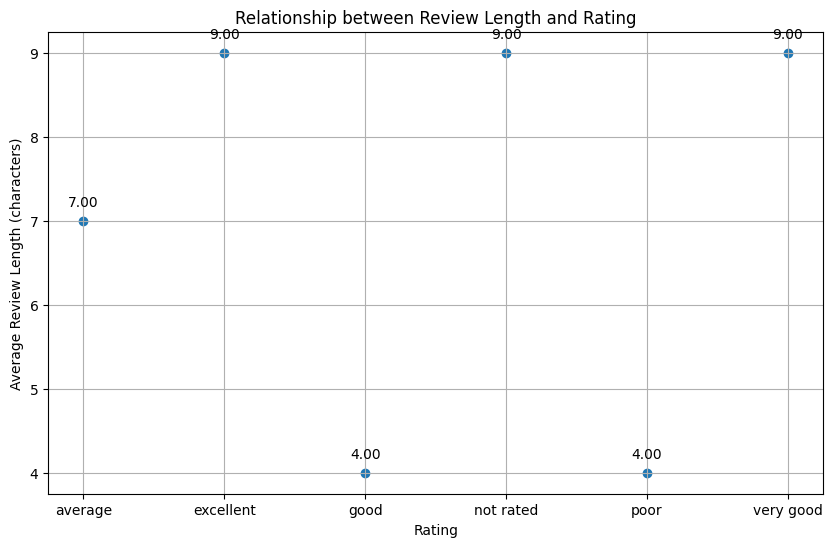

In [48]:
# Calculate the length of each review in terms of characters
data['Review_Length'] = data['Rating text'].str.len()

# Calculate the average review length
average_review_length = data['Review_Length'].mean()

# Group reviews by rating and calculate the average review length for each rating
rating_avg_length = data.groupby('Rating text')['Review_Length'].mean()

# Print the average review length
print(f"Average Review Length: {average_review_length:.2f} characters")

# Plot the relationship between review length and rating
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(rating_avg_length.index, rating_avg_length.values)
plt.xlabel('Rating')
plt.ylabel('Average Review Length (characters)')
plt.title('Relationship between Review Length and Rating')
plt.grid(True)

# Adding values near the dots
for i, txt in enumerate(rating_avg_length.values):
    plt.annotate(f'{txt:.2f}', (rating_avg_length.index[i], txt), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()
